In [ ]:
import numpy as np
import matplotlib.pyplot as plt

* Activation functions

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def grad_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))
def tanh(x):
    return np.tanh(x)
def grad_tanh(x):
    return 1 - np.tanh(x)**2

* Data creation

In [ ]:
def create_dataset(operation, num_samples):
    x = np.random.randint(2, size=(num_samples, 2))
    if operation == 'XOR':
        y = np.logical_xor(x[:, 0], x[:, 1]).astype(int)
    elif operation == 'AND':
        y = np.logical_and(x[:, 0], x[:, 1]).astype(int)
    elif operation == 'OR':
        y = np.logical_or(x[:, 0], x[:, 1]).astype(int)
    noise = np.random.normal(0, 0.1, x.shape)
    x = np.clip(x + noise, 0, 1)
    return x, y

* Neural Network Trainning

In [ ]:
def fwd_propagate(inputs, weights, operation):
    W1, W2 = weights
    a1 = np.dot(inputs, W1)

    if operation == 'XOR':
        z1 = sigmoid(a1)
    elif operation == 'AND':
        z1 = sigmoid(a1)
    elif operation == 'OR':
        z1 = sigmoid(a1)


    a2 = np.dot(z1, W2)
    if operation == 'XOR':
        out = tanh(a2)
    elif operation == 'AND':
        out = a2
    elif operation == 'OR':
        out = tanh(a2)

    return (a1, z1, a2, out)

def compute_gradients(inputs, targets, weights, activations, operation):
    W1, W2 = weights
    a1, z1, a2, out = activations
    m = inputs.shape[0]

    dz2 = out - targets.reshape(-1, 1)
    if operation == 'XOR':
        da2 = dz2* grad_tanh(a2)
    elif operation == 'AND':
        da2 = dz2
    elif operation == 'OR':
        da2 = dz2 * grad_tanh(a2)
    dj_dw2 = np.dot(z1.T, da2) / m
    if operation == 'XOR':
        dz1 = np.dot(da2, W2.T) * grad_sigmoid(a1)
    elif operation == 'AND':
        dz1 = np.dot(da2, W2.T) * grad_sigmoid(a1)
    elif operation == 'OR':
        dz1 = np.dot(da2, W2.T) * grad_sigmoid(a1)
    dj_dw1 = np.dot(inputs.T, dz1) / m
    return [dj_dw1, dj_dw2]


def apply_gradients(weights, gradients, learning_rate):
    W1, W2 = weights
    dj_dw1, dj_dw2 = gradients
    W1 -= learning_rate * dj_dw1
    W2 -= learning_rate * dj_dw2
    return [W1, W2]


def back_propagate(inputs, targets, weights, activations, learning_rate, operation):
    gradients = compute_gradients(inputs, targets, weights, activations, operation)
    weights = apply_gradients(weights, gradients, learning_rate)
    return weights




In [ ]:
def train_model(operation, num_samples, epochs, learning_rate=0.1, batch_size=32, method='DGD'):

    inputs, targets = create_dataset(operation, num_samples)


    split_index = int(0.8 * num_samples)
    x_train, y_train = inputs[:split_index], targets[:split_index]
    x_test, y_test = inputs[split_index:], targets[split_index:]


    weights = [np.random.randn(2, 2), np.random.randn(2, 1)]
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []


    for epoch in range(epochs):

        indices = np.arange(x_train.shape[0])
        np.random.shuffle(indices)
        x_train = x_train[indices]
        y_train = y_train[indices]

        if method == 'DGD':

            activations = fwd_propagate(x_train, weights, operation)
            weights = back_propagate(x_train, y_train, weights, activations, learning_rate, operation)
        else:

            for i in range(0, x_train.shape[0], batch_size):
                x_batch = x_train[i:i + batch_size]
                y_batch = y_train[i:i + batch_size]

                activations = fwd_propagate(x_batch, weights, operation)
                weights = back_propagate(x_batch, y_batch, weights, activations, learning_rate, operation)


        _, _, _, train_outputs = fwd_propagate(x_train, weights, operation)
        train_loss = np.mean((train_outputs - y_train.reshape(-1, 1))**2)
        train_accuracy = np.mean((train_outputs > 0.5).astype(int) == y_train.reshape(-1, 1))


        _, _, _, test_outputs = fwd_propagate(x_test, weights, operation)
        test_loss = np.mean((test_outputs - y_test.reshape(-1, 1))**2)
        test_accuracy = np.mean((test_outputs > 0.5).astype(int) == y_test.reshape(-1, 1))


        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)


    return weights, train_losses, train_accuracies, test_losses, test_accuracies

def plot_metrics(train_losses, test_losses, train_accuracies, test_accuracies, title):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Training Loss')
    plt.plot(epochs, test_losses, label='Testing Loss')
    plt.title(f'{title} - Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Training Accuracy')
    plt.plot(epochs, test_accuracies, label='Testing Accuracy', color='orange')
    plt.title(f'{title} - Accuracy over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.show()



#  **XOR**






**1.  Deterministic Gradient Descent**



Training for XOR operation using DGD with n=100:


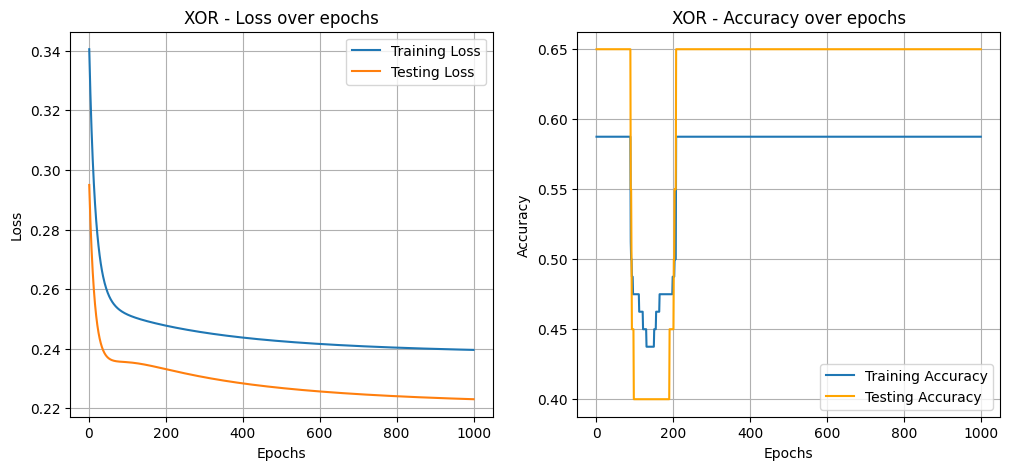

Number of samples 100 -> Train Loss: 0.2396, Train Accuracy: 0.5875, Test Loss: 0.2230, Test Accuracy: 0.6500

Training for XOR operation using DGD with n=700:


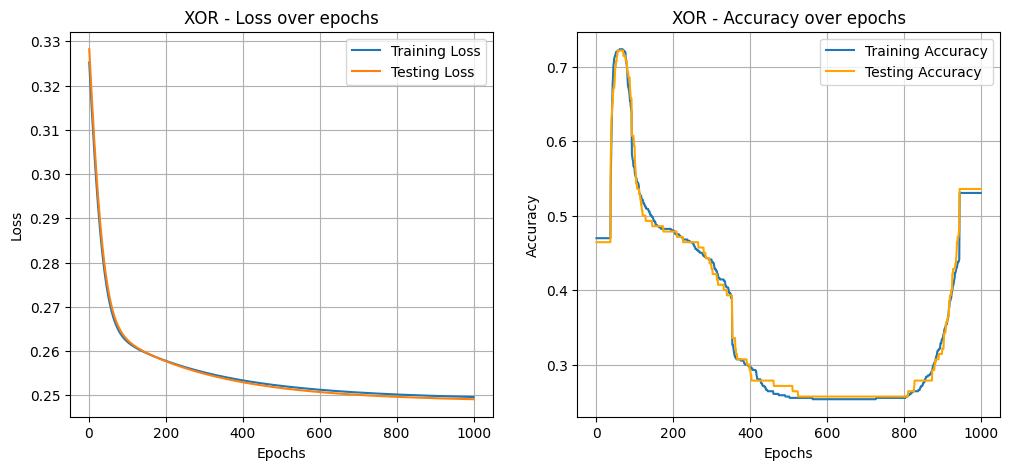

Number of samples 700 -> Train Loss: 0.2496, Train Accuracy: 0.5304, Test Loss: 0.2491, Test Accuracy: 0.5357

Training for XOR operation using DGD with n=1000:


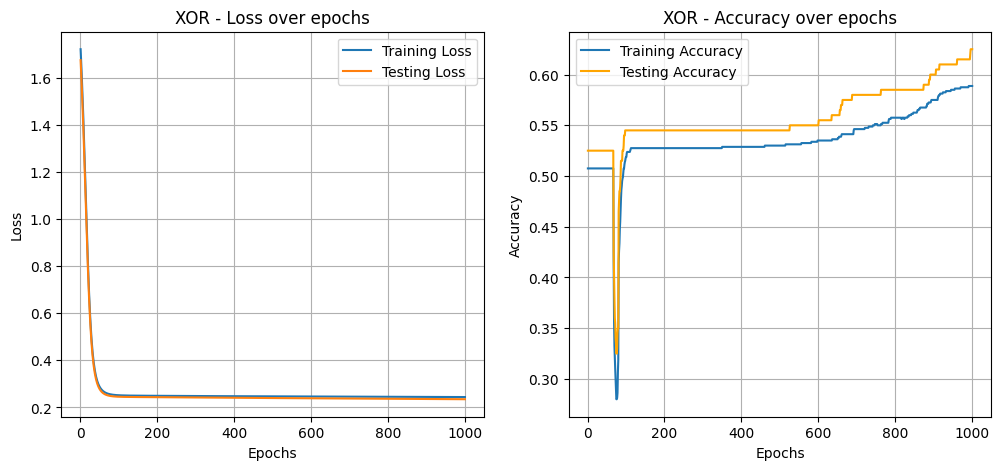

Number of samples 1000 -> Train Loss: 0.2441, Train Accuracy: 0.5887, Test Loss: 0.2348, Test Accuracy: 0.6250



In [ ]:
num_samples=[100,700,1000]
epochs = 1000
for num in num_samples:
        print(f"Training for XOR operation using DGD with n={num}:")
        weights, train_losses, train_accuracies, test_losses, test_accuracies = train_model('XOR', num, epochs)
        plot_metrics(train_losses, test_losses, train_accuracies, test_accuracies, 'XOR')
        print(f"Number of samples {num} -> Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f}, "
             f"Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.4f}")
        print()

**2. Stochastic Gradient Descent**



Training for XOR operation using SGD with batch size=50:


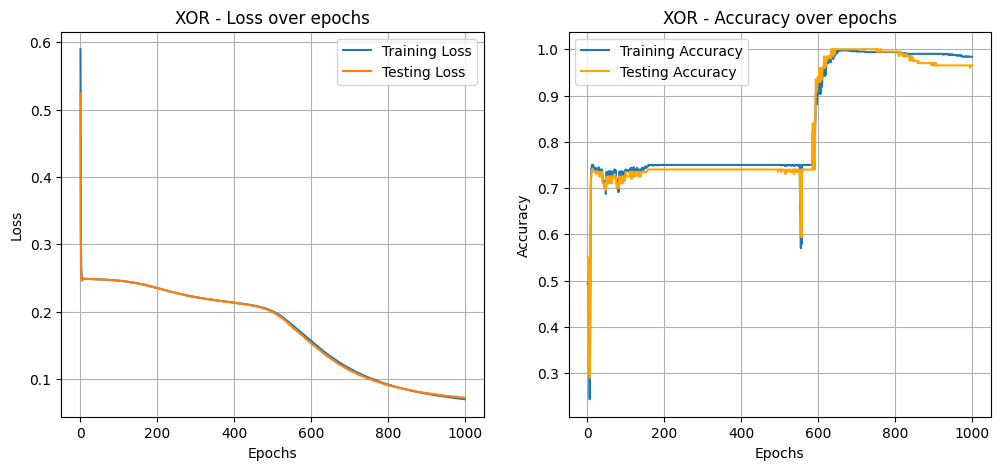

Batch size 50 -> Train Loss: 0.0701, Train Accuracy: 0.9838, Test Loss: 0.0722, Test Accuracy: 0.9650

Training for XOR operation using SGD with batch size=100:


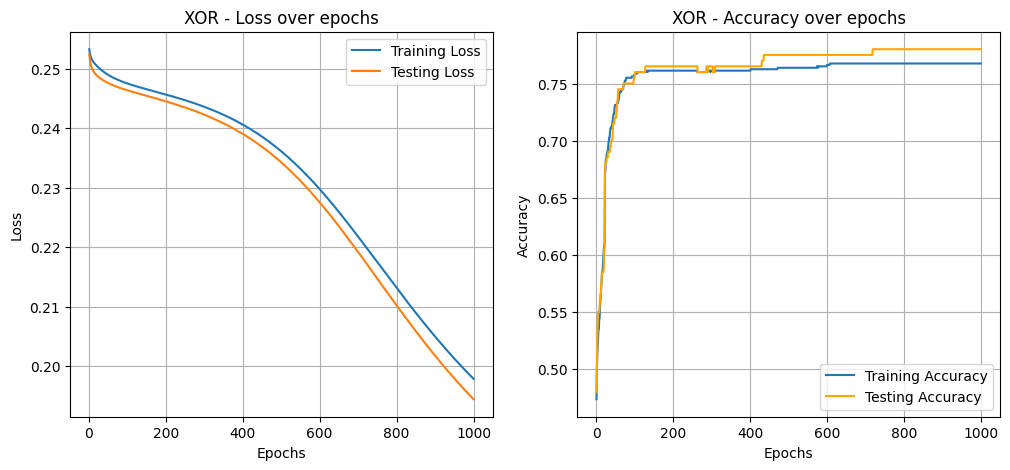

Batch size 100 -> Train Loss: 0.1979, Train Accuracy: 0.7675, Test Loss: 0.1945, Test Accuracy: 0.7800

Training for XOR operation using SGD with batch size=200:


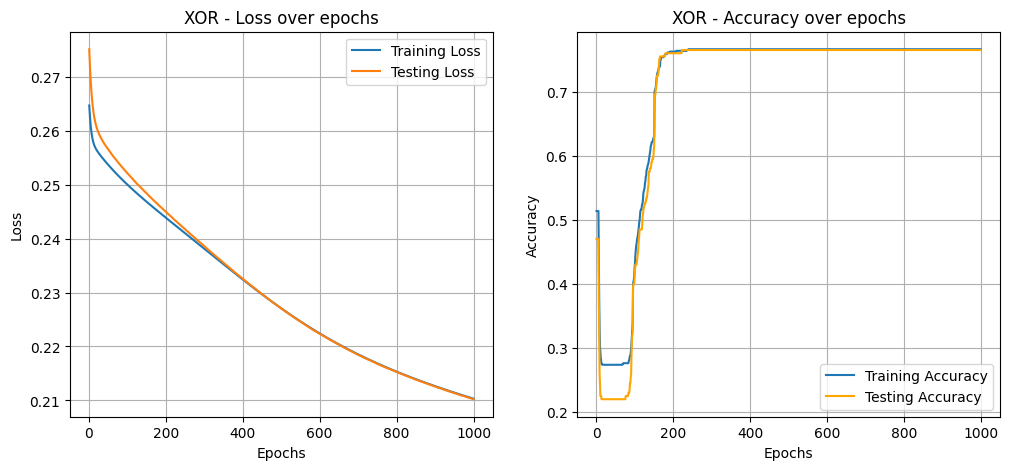

Batch size 200 -> Train Loss: 0.2103, Train Accuracy: 0.7662, Test Loss: 0.2102, Test Accuracy: 0.7650



In [ ]:
num_samples = 1000
epochs = 1000
learning_rate = 0.1
batch_sizes =[50,100,200]

for batch_size in batch_sizes:
        print(f"Training for XOR operation using SGD with batch size={batch_size}:")
        weights, train_losses, train_accuracies, test_losses, test_accuracies = train_model('XOR', num, epochs,learning_rate,batch_size,'SGD')
        plot_metrics(train_losses, test_losses, train_accuracies, test_accuracies, 'XOR')
        print(f"Batch size {batch_size} -> Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f}, "
             f"Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.4f}")
        print()



---





#   **AND**




**1. Deterministic Gradient Descent**

Training for AND operation using DGD with n=100:


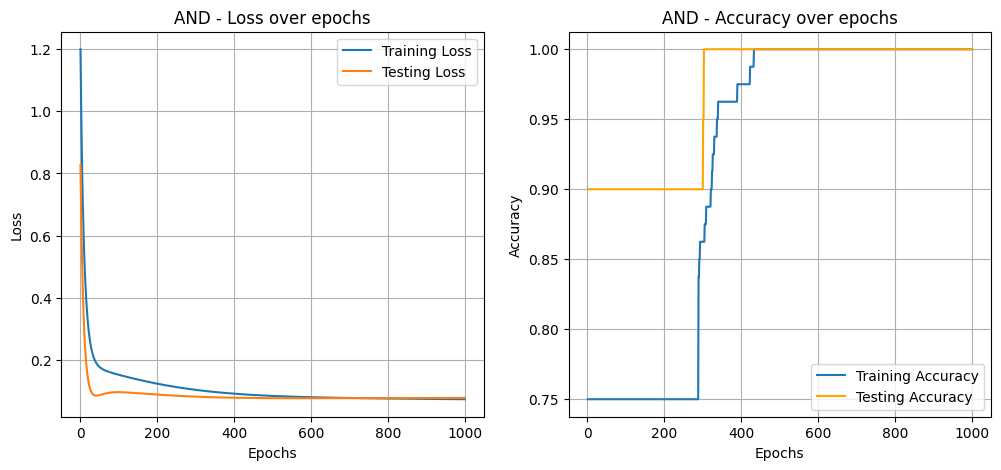

Number of samples 100 -> Train Loss: 0.0730, Train Accuracy: 1.0000, Test Loss: 0.0770, Test Accuracy: 1.0000

Training for AND operation using DGD with n=700:


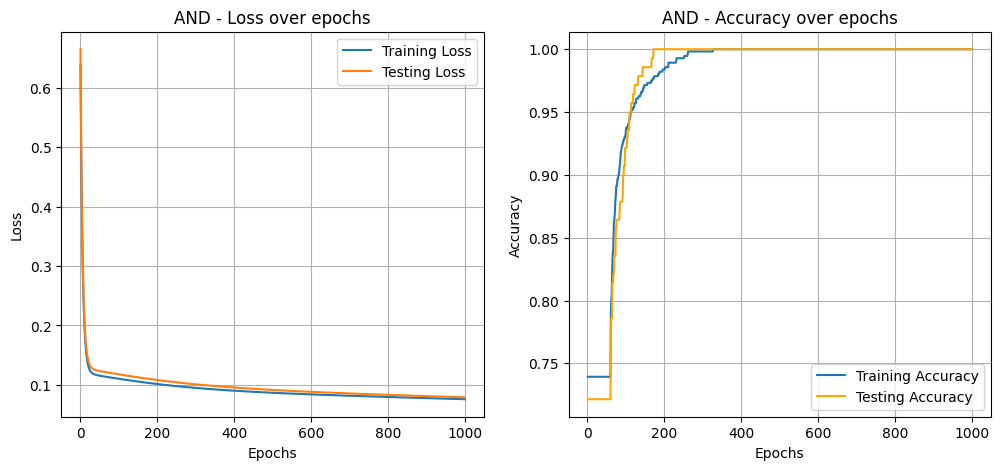

Number of samples 700 -> Train Loss: 0.0757, Train Accuracy: 1.0000, Test Loss: 0.0789, Test Accuracy: 1.0000

Training for AND operation using DGD with n=1000:


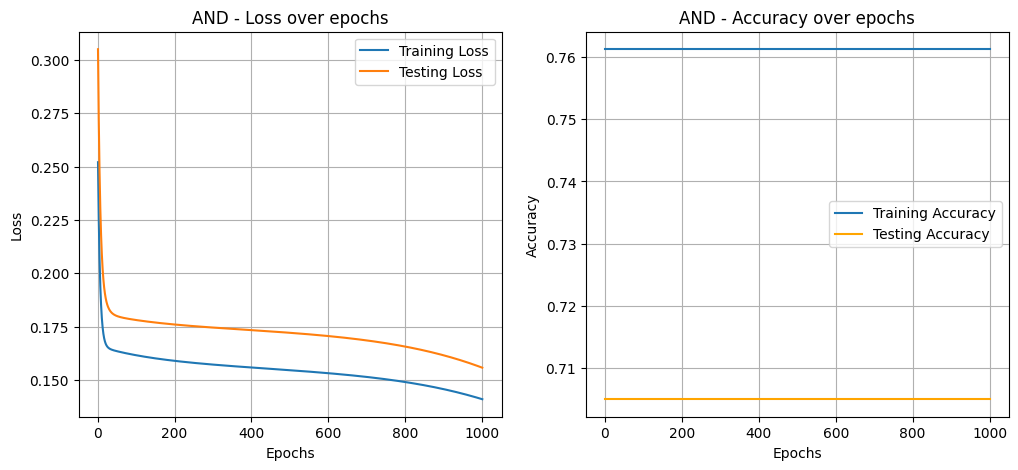

Number of samples 1000 -> Train Loss: 0.1410, Train Accuracy: 0.7612, Test Loss: 0.1558, Test Accuracy: 0.7050



In [ ]:
num_samples=[100,700,1000]
epochs = 1000
for num in num_samples:
        print(f"Training for AND operation using DGD with n={num}:")
        weights, train_losses, train_accuracies, test_losses, test_accuracies = train_model('AND', num, epochs)
        plot_metrics(train_losses, test_losses, train_accuracies, test_accuracies, 'AND')
        print(f"Number of samples {num} -> Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f}, "
             f"Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.4f}")
        print()

**2. Stochastic Gradient Descent**

Training for AND operation using SGD with batch size=50:


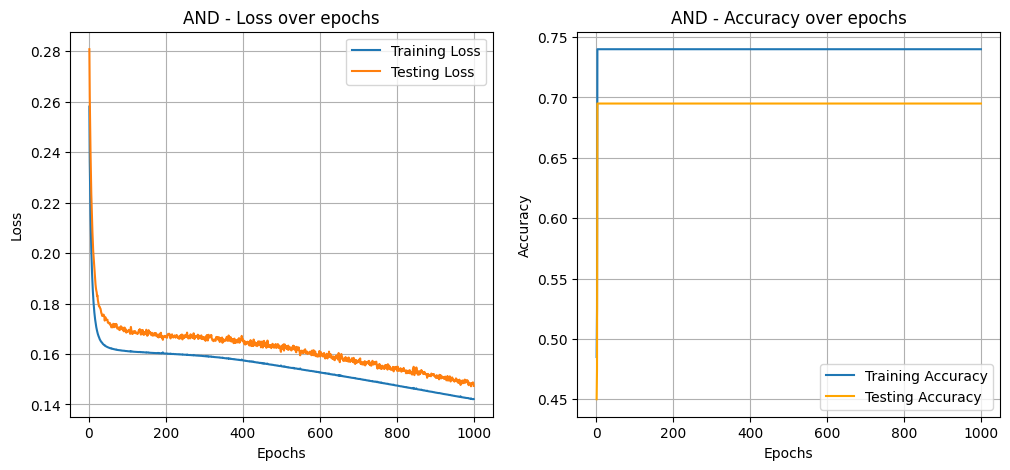

Batch size 50 -> Train Loss: 0.1421, Train Accuracy: 0.7400, Test Loss: 0.1473, Test Accuracy: 0.6950

Training for AND operation using SGD with batch size=100:


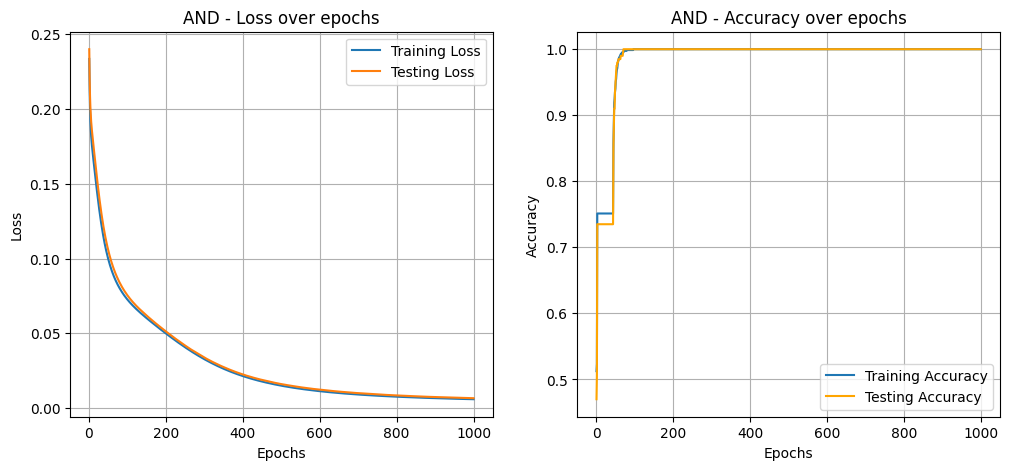

Batch size 100 -> Train Loss: 0.0060, Train Accuracy: 1.0000, Test Loss: 0.0067, Test Accuracy: 1.0000

Training for AND operation using SGD with batch size=200:


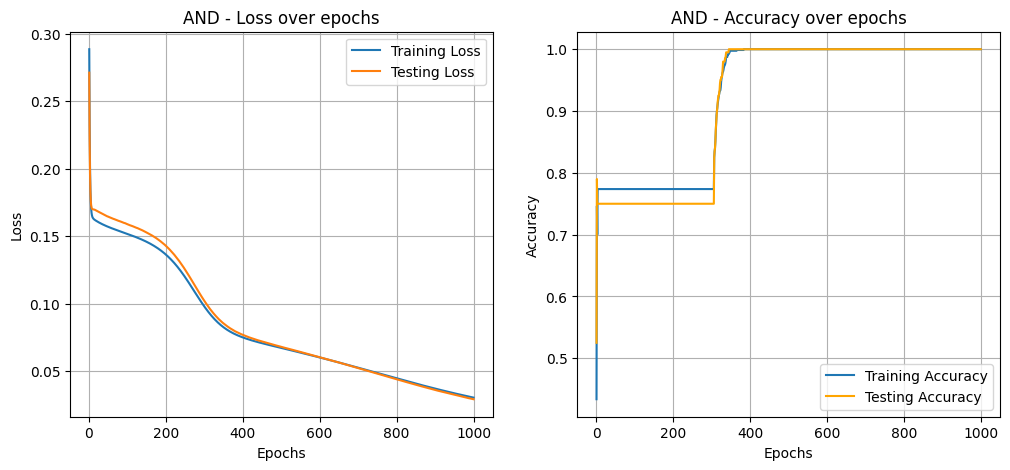

Batch size 200 -> Train Loss: 0.0303, Train Accuracy: 1.0000, Test Loss: 0.0291, Test Accuracy: 1.0000



In [ ]:
num_samples = 1000
epochs = 1000
learning_rate = 0.1
batch_sizes =[50,100,200]

for batch_size in batch_sizes:
        print(f"Training for AND operation using SGD with batch size={batch_size}:")
        weights, train_losses, train_accuracies, test_losses, test_accuracies = train_model('AND', num, epochs,learning_rate,batch_size,'SGD')
        plot_metrics(train_losses, test_losses, train_accuracies, test_accuracies, 'AND')
        print(f"Batch size {batch_size} -> Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f}, "
             f"Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.4f}")
        print()

---



#  **OR**   




**1. Deterministic Gradient Descent**

Training for OR operation using DGD with n=100:


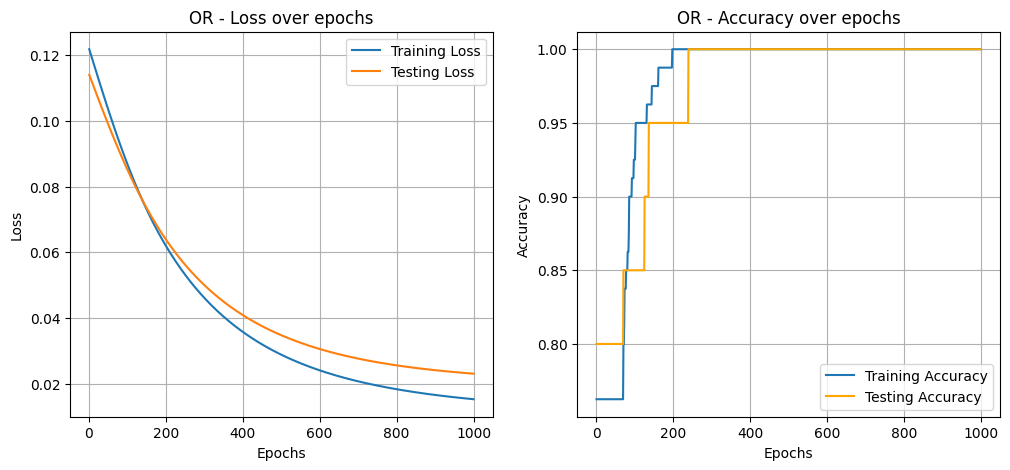

Number of samples 100 -> Train Loss: 0.0153, Train Accuracy: 1.0000, Test Loss: 0.0231, Test Accuracy: 1.0000

Training for OR operation using DGD with n=700:


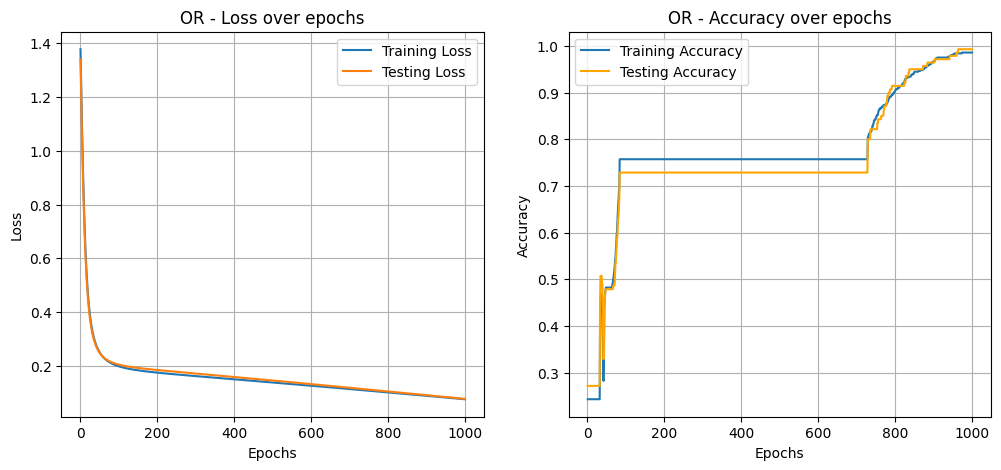

Number of samples 700 -> Train Loss: 0.0767, Train Accuracy: 0.9857, Test Loss: 0.0781, Test Accuracy: 0.9929

Training for OR operation using DGD with n=1000:


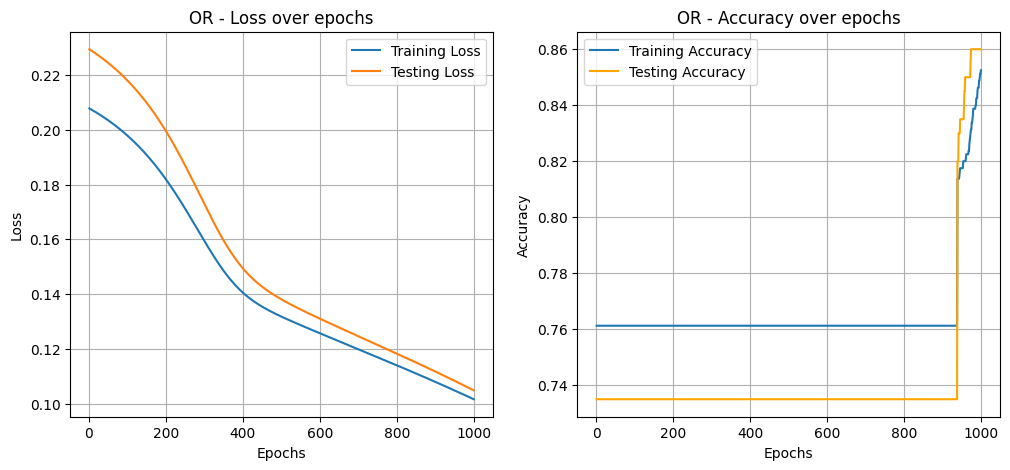

Number of samples 1000 -> Train Loss: 0.1016, Train Accuracy: 0.8525, Test Loss: 0.1049, Test Accuracy: 0.8600



In [ ]:
num_samples=[100,700,1000]
epochs = 1000
for num in num_samples:
        print(f"Training for OR operation using DGD with n={num}:")
        weights, train_losses, train_accuracies, test_losses, test_accuracies = train_model('OR', num, epochs)
        plot_metrics(train_losses, test_losses, train_accuracies, test_accuracies, 'OR')
        print(f"Number of samples {num} -> Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f}, "
             f"Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.4f}")
        print()

**2. Stochastic Gradient Descent**

Training for OR operation using SGD with batch size=50:


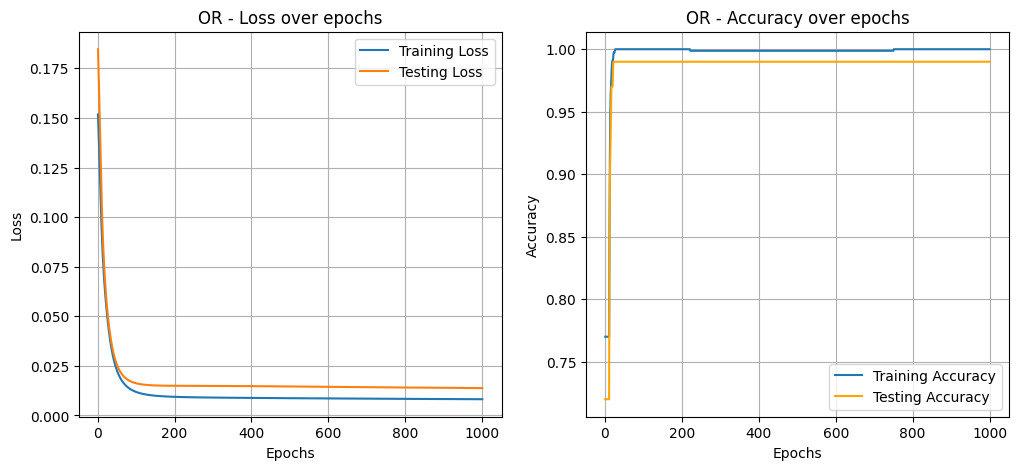

Batch size 50 -> Train Loss: 0.0082, Train Accuracy: 1.0000, Test Loss: 0.0138, Test Accuracy: 0.9900

Training for OR operation using SGD with batch size=100:


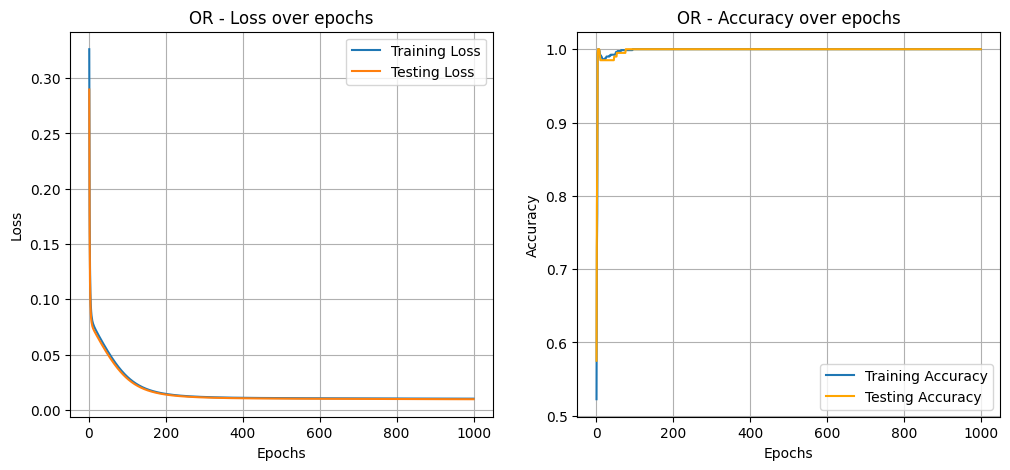

Batch size 100 -> Train Loss: 0.0101, Train Accuracy: 1.0000, Test Loss: 0.0096, Test Accuracy: 1.0000

Training for OR operation using SGD with batch size=200:


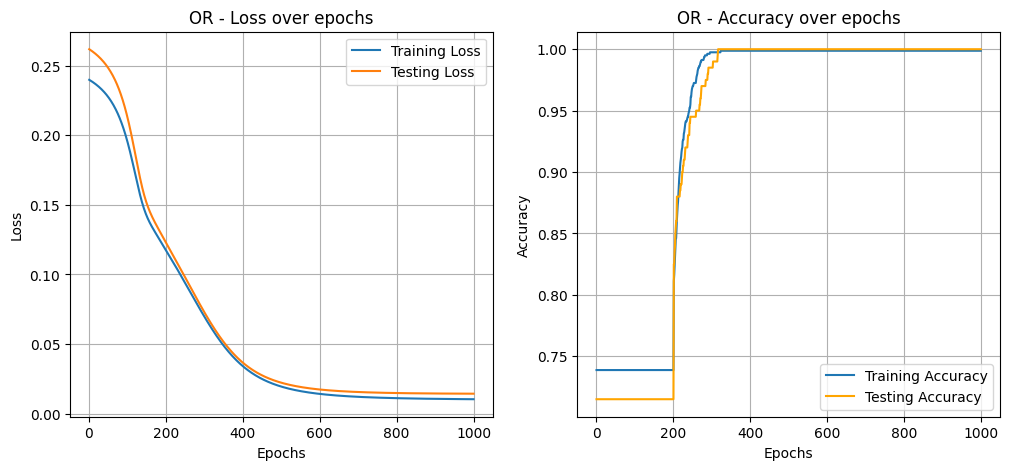

Batch size 200 -> Train Loss: 0.0105, Train Accuracy: 0.9988, Test Loss: 0.0144, Test Accuracy: 1.0000



In [ ]:
num_samples = 1000
epochs = 1000
learning_rate = 0.1
batch_sizes =[50,100,200]

for batch_size in batch_sizes:
        print(f"Training for OR operation using SGD with batch size={batch_size}:")
        weights, train_losses, train_accuracies, test_losses, test_accuracies = train_model('OR', num, epochs,learning_rate,batch_size,'SGD')
        plot_metrics(train_losses, test_losses, train_accuracies, test_accuracies, 'OR')
        print(f"Batch size {batch_size} -> Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f}, "
             f"Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.4f}")
        print()
